C:\Resources\Programming\anaconda3-2023.9\envs\GP_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Resources\Programming\anaconda3-2023.9\envs\GP_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Resources\Programming\anaconda3-2023.9\envs\GP_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Resources\Programming\anaconda3-2023.9\envs\GP_torch\lib\site-pack

[[2.89400000e+00 3.12305144e+04]
 [1.85746269e+01 4.02244343e+04]
 [1.44461538e+01 3.79275615e+03]
 [1.14277778e+01 1.90306011e+04]]
[[ 1.52511416]
 [62.55555556]
 [52.35135135]
 [72.38461538]]


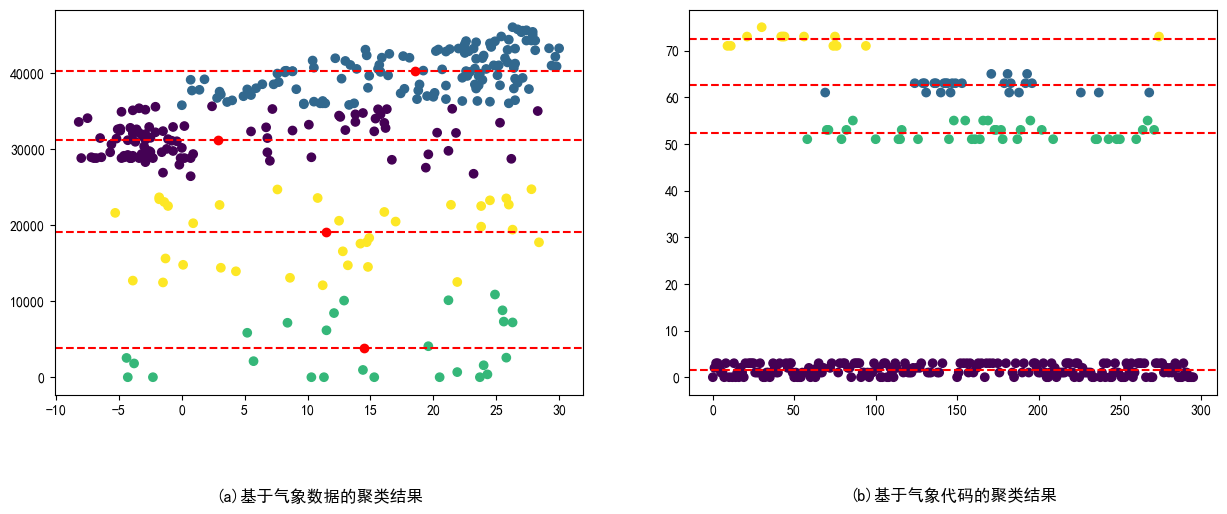

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 读取样本数据
data = pd.read_csv("weather data.csv")
tem_mean = np.array(data.iloc[:,3]).tolist()
sun_during = np.array(data.iloc[:,7]).tolist()
input_data = np.array([[tem_mean[i], sun_during[i]] for i in range(len(tem_mean))])
# 使用 K 均值聚类算法
kmeans = KMeans(n_clusters=4)
kmeans.fit(input_data)
y_kmeans = kmeans.predict(input_data)
centers = kmeans.cluster_centers_
print(centers)

# 绘制聚类结果
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(input_data[:,0], input_data[:,1], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.axhline(y=centers[0][1], color='red', linestyle='--')
plt.axhline(y=centers[1][1], color='red', linestyle='--')
plt.axhline(y=centers[2][1], color='red', linestyle='--')
plt.axhline(y=centers[3][1], color='red', linestyle='--')
plt.title("(a)基于气象数据的聚类结果", y=-0.3)

# 读取样本数据
data = pd.read_csv("weather data.csv")
weather_code = np.array(data.iloc[:,1]).tolist()
input_data = np.array(weather_code).reshape(-1,1)
# 使用 K 均值聚类算法
kmeans = KMeans(n_clusters=4)
kmeans.fit(input_data)
y_kmeans = kmeans.predict(input_data)
centers = kmeans.cluster_centers_
print(centers)

plt.subplot(122)
x = range(0,296,1)
plt.scatter(x, input_data[:,0], c=y_kmeans, cmap='viridis')
plt.axhline(y=centers[0][0], color='red', linestyle='--')
plt.axhline(y=centers[1][0], color='red', linestyle='--')
plt.axhline(y=centers[2][0], color='red', linestyle='--')
plt.axhline(y=centers[3][0], color='red', linestyle='--')
plt.title("(b)基于气象代码的聚类结果", y=-0.3)
plt.savefig("weather cluster result.png", bbox_inches='tight')
plt.show()